# 01. PyTorch Fundamentals Exercises

In [1]:
import torch
import matplotlib.pyplot as plt

## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

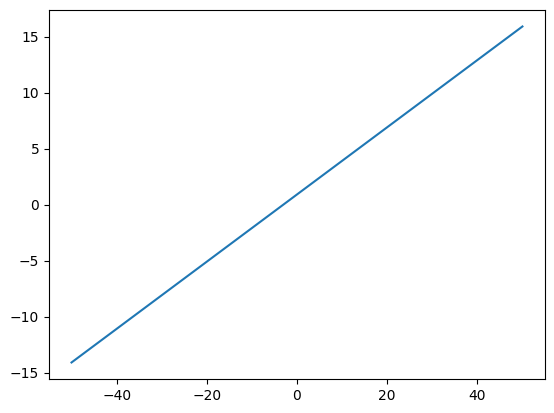

In [4]:
w = 0.3
b = 0.9

x = torch.arange(-50, 51, 1)
y = w * x + b

plt.plot(x,y)

In [5]:
ratio = 0.8
size = len(x)
point = int(size * ratio)

In [6]:
xt, yt = x[:point], y[:point]
xv, yv = x[point:], y[point:]

In [7]:
def plot_truth(xt, yt, xv, yv) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.legend()
    
def plot_guess(xt, yt, xv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()
    
def plot_both(xt, yt, xv, yv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()

def plot_loss(epoch, loss) :
    plt.plot(epoch, loss)

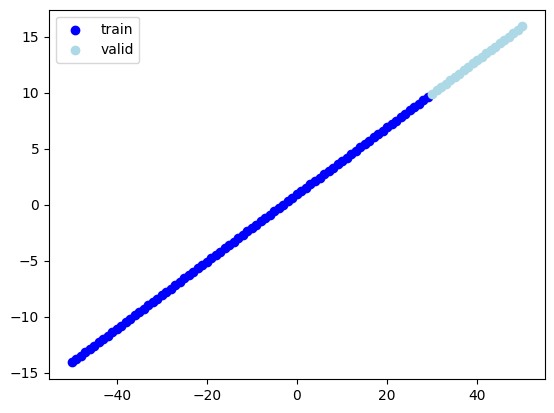

In [8]:
plot_truth(xt,yt,xv,yv)

## 2. Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.